# Sentimental Analysis 

In [1]:
pip install pandas nltk vaderSentiment transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: C:\Users\Daniela Pamelin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import matplotlib.pyplot as plt

In [3]:
#Loaad again the data
plot_summary_df = pd.read_csv("plot_summaries.txt", delimiter='\t', names=["wikipedia_id", "plot_summary"])
movies_df = pd.read_csv("movies_dataset.tsv", delimiter='\t')
merged_df = pd.merge(plot_summary_df, movies_df, on="wikipedia_id", how="inner")

In [4]:

merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')
merged_df = merged_df.dropna(subset=['release_date'])
merged_df['year'] = merged_df['release_date'].dt.year
analyzer = SentimentIntensityAnalyzer()

We are using VADER (Valence Aware Dictionary and sEntiment Reasoner), a sentiment analysis tool available in the nltk library. VADER is particularly well-suited for analyzing short texts and is widely used for general sentiment analysis tasks.

The analysis focuses on the Compound Score, a metric provided by VADER that encapsulates the overall sentiment of a text in a single value ranging from -1 to 1:

- Scores close to -1 indicate a highly negative sentiment.
- Scores close to 1 represent a highly positive sentiment.
- Scores near 0 suggest a neutral sentiment.

By applying VADER’s compound score, I aim to quantify the sentiment across different movie plots and observe trends over time, correlating these sentiment shifts with significant historical events and seasonal variations. This approach will help reveal how cinema sentiment changes in response to broader societal and temporal influences.

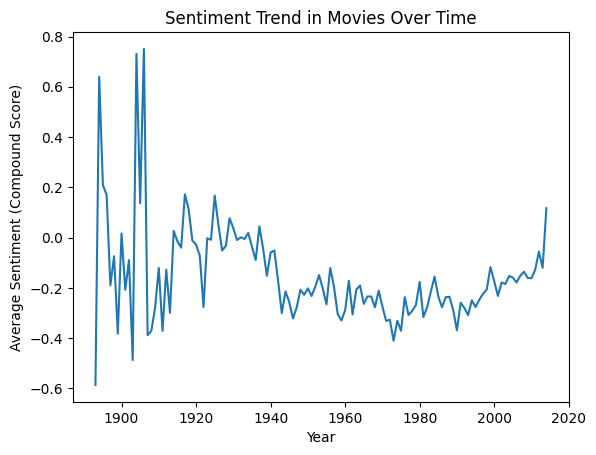

In [ ]:
#Sentimental analysis over time

merged_df['sentiment'] = merged_df['plot_summary'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
average_sentiment_by_year = merged_df.groupby('year')['sentiment'].mean().reset_index()

plt.plot(average_sentiment_by_year['year'], average_sentiment_by_year['sentiment'])
plt.xlabel('Year')
plt.ylabel('Average Sentiment (Compound Score)')
plt.title('Sentiment Trend in Movies Over Time')
plt.show()


In [ ]:
# Basic statistics for the sentiment score
print(merged_df['sentiment'].describe())

positive_count = len(merged_df[merged_df['sentiment'] > 0])
neutral_count = len(merged_df[merged_df['sentiment'] == 0])
negative_count = len(merged_df[merged_df['sentiment'] < 0])

print("Positive summaries:", positive_count)
print("Neutral summaries:", neutral_count)
print("Negative summaries:", negative_count)


count    39499.000000
mean        -0.193300
std          0.793842
min         -1.000000
25%         -0.959850
50%         -0.542300
75%          0.719150
max          0.999900
Name: sentiment, dtype: float64
Positive summaries: 15465
Neutral summaries: 572
Negative summaries: 23462


The average sentiment score is approximately -0.1938, indicating that the overall sentiment in movie plot summaries tends to lean slightly negative. And The standard deviation is 0.7934, suggesting a moderate spread of sentiment scores around the mean.

There are 15,405 plot summaries with a positive sentiment score, indicating that around 38% of the total dataset leans positive.Only 572 summaries are neutral, representing a very small portion of the dataset. A significant portion, 23,462 summaries, have negative sentiment scores, making up approximately 59% of the total dataset.

The data suggests that movie plot summaries tend to have more negative sentiment, which could be due to the nature of movie genres and themes often revolving around conflict, drama, and challenges. Additionally, the relatively low number of neutral summaries implies that most plot summaries are polarized towards either positive or negative sentiment.


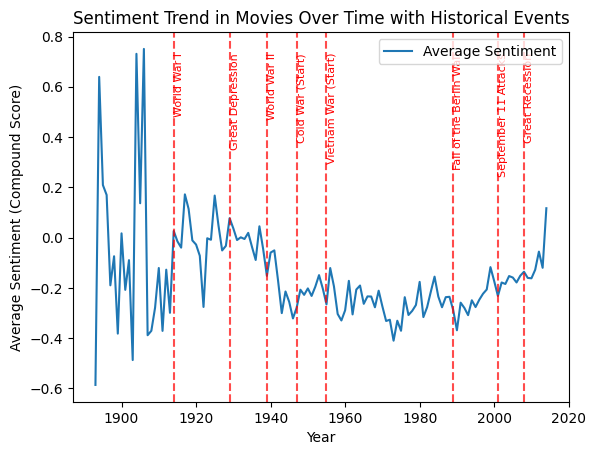

In [ ]:


# Create the average sentiment trend plot over time
plt.plot(average_sentiment_by_year['year'], average_sentiment_by_year['sentiment'], label="Average Sentiment")

# Mark historical events
historical_events = {
    "World War I": 1914,
    "Great Depression": 1929,
    "World War II": 1939,
    "Cold War (Start)": 1947,
    "Vietnam War (Start)": 1955,
    "Fall of the Berlin Wall": 1989,
    "September 11 Attacks": 2001,
    "Great Recession": 2008,
}

for event, year in historical_events.items():
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)
    plt.text(year, plt.ylim()[1]*0.9, event, rotation=90, verticalalignment='top', color='red', fontsize=8)
    
plt.xlabel('Year')
plt.ylabel('Average Sentiment (Compound Score)')
plt.title('Sentiment Trend in Movies Over Time with Historical Events')
plt.legend()
plt.show()


The plot suggests that significant historical events often correlate with shifts in sentiment trends in movies. For example, wars and economic downturns are associated with dips in sentiment, while events symbolizing hope or recovery, like the Fall of the Berlin Wall, are followed by slight sentiment increases. This could imply that cinema reflects societal mood, adapting its storytelling to resonate with or provide commentary on the public sentiment of the time.

In [ ]:
from scipy.stats import ttest_ind

# Define historical events with their respective periods
historical_events = {
    "World War I": {"before": (1900, 1913), "during": (1914, 1918), "after": (1919, 1925)},
    "Great Depression": {"before": (1926, 1928), "during": (1929, 1933), "after": (1934, 1939)},
    "World War II": {"before": (1930, 1938), "during": (1939, 1945), "after": (1946, 1955)},
    "Space Race": {"before": (1950, 1956), "during": (1957, 1969), "after": (1970, 1975)},
    "9/11": {"before": (1995, 2000), "during": (2001, 2001), "after": (2002, 2006)},
    "Great Recession": {"before": (2000, 2006), "during": (2007, 2009), "after": (2010, 2015)}
}

# Loop through each historical event
for event, periods in historical_events.items():

    period_before = merged_df[(merged_df['release_date'].dt.year >= periods["before"][0]) & 
                              (merged_df['release_date'].dt.year <= periods["before"][1])]
    period_during = merged_df[(merged_df['release_date'].dt.year >= periods["during"][0]) & 
                              (merged_df['release_date'].dt.year <= periods["during"][1])]
    period_after = merged_df[(merged_df['release_date'].dt.year >= periods["after"][0]) & 
                             (merged_df['release_date'].dt.year <= periods["after"][1])]
    
    sentiment_before = period_before['sentiment'].mean()
    sentiment_during = period_during['sentiment'].mean()
    sentiment_after = period_after['sentiment'].mean()
    
    print(f"\n{event} Sentiment Averages:")
    print(f"Before {event}: {sentiment_before}")
    print(f"During {event}: {sentiment_during}")
    print(f"After {event}: {sentiment_after}")
    
  
    t_stat_before_during, p_val_before_during = ttest_ind(period_before['sentiment'], period_during['sentiment'], nan_policy='omit')
    t_stat_during_after, p_val_during_after = ttest_ind(period_during['sentiment'], period_after['sentiment'], nan_policy='omit')
    t_stat_before_after, p_val_before_after = ttest_ind(period_before['sentiment'], period_after['sentiment'], nan_policy='omit')
    
 
    print(f"\nt-test results for {event}:")
    print(f"Before vs During: t-statistic = {t_stat_before_during}, p-value = {p_val_before_during}")
    print(f"During vs After: t-statistic = {t_stat_during_after}, p-value = {p_val_during_after}")
    print(f"Before vs After: t-statistic = {t_stat_before_after}, p-value = {p_val_before_after}")
    

    if p_val_before_during < 0.05:
        print("Statistically significant sentiment change from before to during the event.")
    else:
        print("No statistically significant sentiment change from before to during the event.")

    if p_val_during_after < 0.05:
        print("Statistically significant sentiment change from during to after the event.")
    else:
        print("No statistically significant sentiment change from during to after the event.")

    if p_val_before_after < 0.05:
        print("Statistically significant sentiment change from before to after the event.")
    else:
        print("No statistically significant sentiment change from before to after the event.")


World War I Sentiment Averages:
Before World War I: -0.24406358024691363
During World War I: 0.04599416342412451
After World War I: -0.016297309417040357

t-test results for World War I:
Before vs During: t-statistic = -4.149323017539825, p-value = 4.043624509644461e-05
During vs After: t-statistic = 1.082358893710921, p-value = 0.2794652575446079
Before vs After: t-statistic = -3.4473195359761153, p-value = 0.0006054010328646573
Statistically significant sentiment change from before to during the event.
No statistically significant sentiment change from during to after the event.
Statistically significant sentiment change from before to after the event.

Great Depression Sentiment Averages:
Before Great Depression: -0.016515789473684213
During Great Depression: 0.014301148105625713
After Great Depression: -0.043206006006006006

t-test results for Great Depression:
Before vs During: t-statistic = -0.5906901863786951, p-value = 0.5548436861325385
During vs After: t-statistic = 1.706768

Average sentiment during World War II (1939-1945): -0.16989715254237286
Average sentiment before World War II (1930-1938): -0.012102469135802473
Average sentiment after World War II (1946-1955): -0.22376322365680965


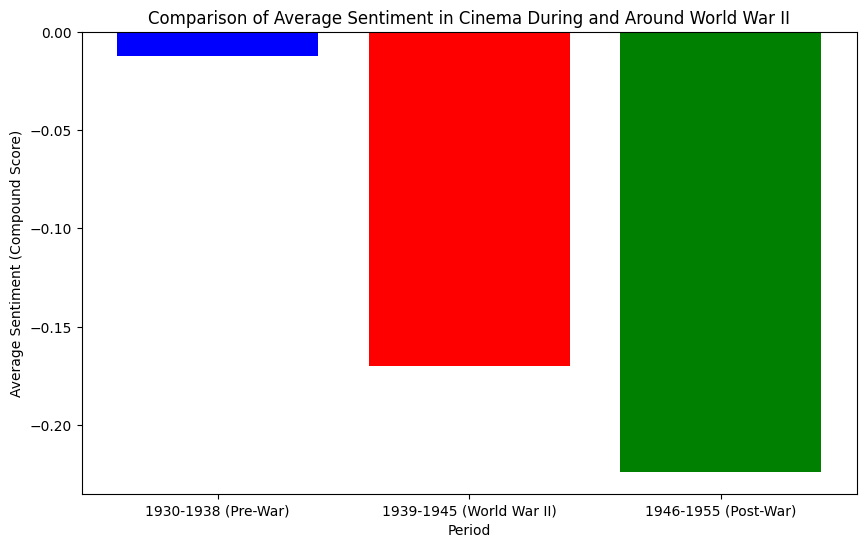

In [ ]:

ww2_df = merged_df[(merged_df['year'] >= 1939) & (merged_df['year'] <= 1945)]
average_sentiment_ww2 = ww2_df['sentiment'].mean()
print(f"Average sentiment during World War II (1939-1945): {average_sentiment_ww2}")

pre_ww2_df = merged_df[(merged_df['year'] >= 1930) & (merged_df['year'] < 1939)]
average_sentiment_pre_ww2 = pre_ww2_df['sentiment'].mean()
print(f"Average sentiment before World War II (1930-1938): {average_sentiment_pre_ww2}")


post_ww2_df = merged_df[(merged_df['year'] > 1945) & (merged_df['year'] <= 1955)]
average_sentiment_post_ww2 = post_ww2_df['sentiment'].mean()
print(f"Average sentiment after World War II (1946-1955): {average_sentiment_post_ww2}")


years = ['1930-1938 (Pre-War)', '1939-1945 (World War II)', '1946-1955 (Post-War)']
average_sentiments = [average_sentiment_pre_ww2, average_sentiment_ww2, average_sentiment_post_ww2]


plt.figure(figsize=(10, 6))
plt.bar(years, average_sentiments, color=['blue', 'red', 'green'])
plt.xlabel('Period')
plt.ylabel('Average Sentiment (Compound Score)')
plt.title('Comparison of Average Sentiment in Cinema During and Around World War II')
plt.show()


In [ ]:

period_before_war = merged_df[(merged_df['release_date'].dt.year >= 1930) & (merged_df['release_date'].dt.year <= 1938)]
period_during_war = merged_df[(merged_df['release_date'].dt.year >= 1939) & (merged_df['release_date'].dt.year <= 1945)]
period_after_war = merged_df[(merged_df['release_date'].dt.year >= 1946) & (merged_df['release_date'].dt.year <= 1955)]


sentiment_before_war = period_before_war['sentiment'].mean()
sentiment_during_war = period_during_war['sentiment'].mean()
sentiment_after_war = period_after_war['sentiment'].mean()

print("Average sentiment before World War II (1930-1938):", sentiment_before_war)
print("Average sentiment during World War II (1939-1945):", sentiment_during_war)
print("Average sentiment after World War II (1946-1955):", sentiment_after_war)

# Perform t-tests 
t_stat_before_during, p_val_before_during = ttest_ind(period_before_war['sentiment'], period_during_war['sentiment'], nan_policy='omit')
t_stat_during_after, p_val_during_after = ttest_ind(period_during_war['sentiment'], period_after_war['sentiment'], nan_policy='omit')
t_stat_before_after, p_val_before_after = ttest_ind(period_before_war['sentiment'], period_after_war['sentiment'], nan_policy='omit')

print("\nt-test between before and during the war:")
print("t-statistic:", t_stat_before_during, "p-value:", p_val_before_during)

print("\nt-test between during and after the war:")
print("t-statistic:", t_stat_during_after, "p-value:", p_val_during_after)

print("\nt-test between before and after the war:")
print("t-statistic:", t_stat_before_after, "p-value:", p_val_before_after)

# Interpretation
if p_val_before_during < 0.05:
    print("\nThe difference in sentiment between the period before and during the war is statistically significant.")
else:
    print("\nThere is no statistically significant difference in sentiment between the period before and during the war.")

if p_val_during_after < 0.05:
    print("The difference in sentiment between the period during and after the war is statistically significant.")
else:
    print("There is no statistically significant difference in sentiment between the period during and after the war.")

if p_val_before_after < 0.05:
    print("The difference in sentiment between the period before and after the war is statistically significant.")
else:
    print("There is no statistically significant difference in sentiment between the period before and after the war.")

Average sentiment before World War II (1930-1938): -0.012102469135802473
Average sentiment during World War II (1939-1945): -0.16989715254237286
Average sentiment after World War II (1946-1955): -0.22376322365680965

t-test between before and during the war:
t-statistic: 5.848330328380449 p-value: 5.444415037863289e-09

t-test between during and after the war:
t-statistic: 2.0910372407529065 p-value: 0.0365897194299003

t-test between before and after the war:
t-statistic: 8.832036375840135 p-value: 1.4756922278536905e-18

The difference in sentiment between the period before and during the war is statistically significant.
The difference in sentiment between the period during and after the war is statistically significant.
The difference in sentiment between the period before and after the war is statistically significant.


Interpretation

- Pre-War Sentiment (1930-1938): Slightly negative, indicating a mild level of negative sentiment in movies.
- During World War II (1939-1945): Sentiment became more negative, suggesting that films reflected the somber and intense atmosphere of the wartime period.
- Post-War Sentiment (1946-1955): Sentiment remained negative and even slightly more so than during the war, possibly reflecting themes of loss, trauma, and societal rebuilding.


Statistical tests confirmed that these sentiment shifts are significant, indicating that the mood in films was indeed influenced by the war. This highlights how major historical events like World War II impact the emotional tone of cinema, with films often mirroring the broader societal mood of the time.